## Домашнее задание №4

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as img

### Задача №1
- _**Постройте график**_
- _**Назовите график**_
- _**Сделайте именование оси x и оси y**_
- _**Сделайте выводы**_

#### _**1.1**_
_**Скачать файл в уроке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv**_

In [2]:
df = pd.read_csv(r'C:\Users\Дмитрий\Documents\geekbrains\9_jupiter\ДЗ_3\kc_house_data.csv', encoding = 'cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### _**1.2**_
_**Изучите стоимости недвижимости**_

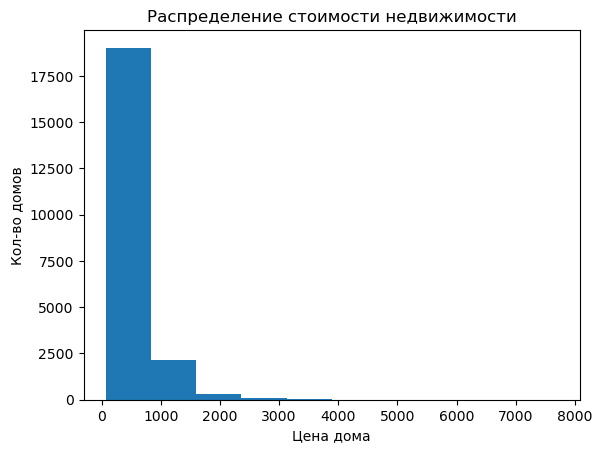

In [4]:
plt.hist(df['price']/1000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена дома')
plt.ylabel('Кол-во домов');

**Вывод:**  
Наибольшее количество домов (~ 88% от общего количества, ~ 19 100 домов из ~ 21 600) имеет стоимость до ~ 850 тыс. С повышением цены количество представленных объектов резко падает. Так, стоимость в пределах от ~ 850 тыс. до ~ 1 млн 500 тыс. имеют ~ 11% объектов (~ 2300 домов из 21 600) Стоимость более ~ 2 млн 300 тыс. имеет ~ 1% домов

#### _**1.3**_
_**Изучите распределение квадратуры жилой**_

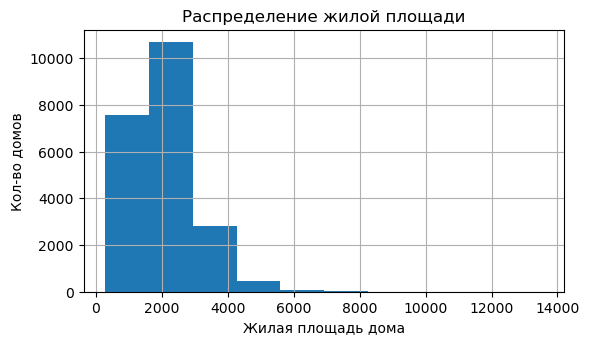

In [6]:
plt.figure(figsize=(6.2, 3.4))
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь дома')
plt.ylabel('Кол-во домов')
plt.grid(True);#добавим сетку

**Вывод:**  
Наибольшее число домов (~ 49% обещего количества, ~ 10 500 домов ) - это дома с жилой площадью от ~ 1900 тыс. до ~ 3000 тыс. На втором месте (~ 36%, ~ 7 800 домов) - дома с жилой площадью до 2000 тыс. ~ 13% (~ 2 800 домов) имеют жилую площадь от ~ 3 000 тыс. до 4 100 Доля домов с жилой площадью более ~ 4 100 не значительна.

#### _**1.4**_
_**Изучите распределение года постройки**_

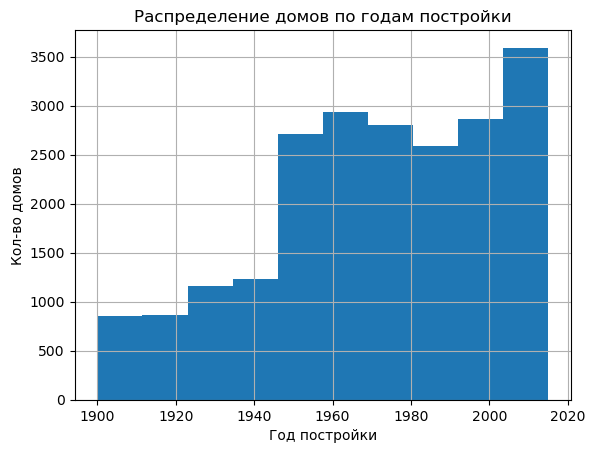

In [14]:
plt.hist(df['yr_built'])
plt.title('Распределение домов по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.grid(True);

**Вывод:**  
Преобладают дома от 1980 до 2015 года постройки. Так же значительную долю занимают дома с годом постройки от 1950 до 1980 года. Дома от 1900 до 1950 года постройки занимают меньшую долю.

### Задача №2

#### _**2.1**_
- _**Изучите распределение домов от наличия вида на набережную**_
- _**Постройте график**_
- _**Сделайте выводы**_

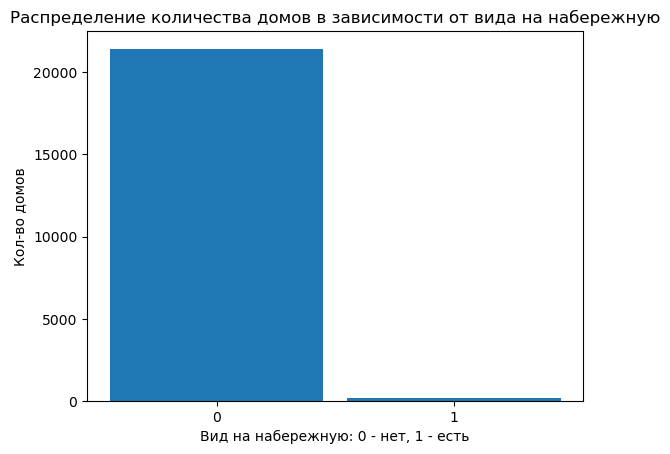

In [11]:
df['waterfront_1'] = df['waterfront'].apply(lambda x: str(x))
plt.hist(df['waterfront_1'], bins = range(df['waterfront_1'].nunique()+1), rwidth=0.9, align = 'left')
plt.title('Распределение количества домов в зависимости от вида на набережную')
plt.xlabel('Вид на набережную: 0 - нет, 1 - есть')
plt.ylabel('Кол-во домов');

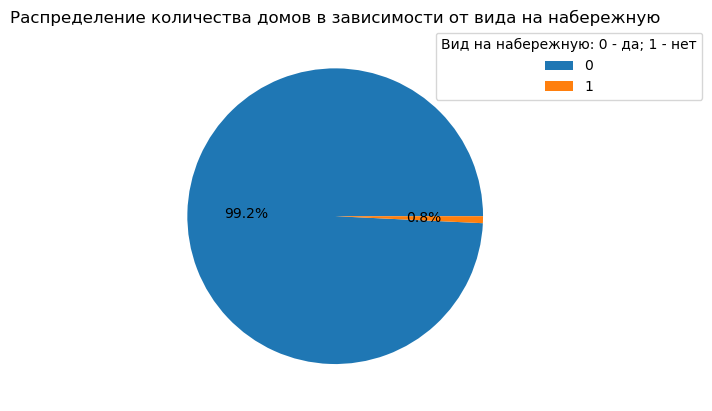

In [12]:
df_w = df['waterfront'].value_counts()
plt.title('Распределение количества домов в зависимости от вида на набережную')
plt.pie(df_w.values, autopct = '%.1f%%')
plt.legend(df_w.index, title = "Вид на набережную: 0 - да; 1 - нет", loc=(0.772, 0.815));

**Вывод:**  
Большинство домов не имеют вида на набережную (99,2%). Домов с видом на набережную очень мало (0,8%).

#### _**2.2**_
_**Изучите распределение этажей домов**_

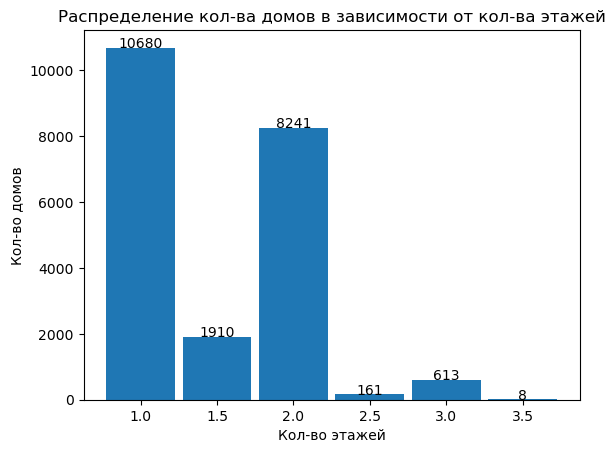

In [13]:
def addlabels(x):
    for i in range(len(x)):
        plt.text(i, x[i], x[i], ha = 'center')
        
df['floors_1'] = df['floors'].apply(lambda x: str(x))
df_sorted = df.sort_values(by=['floors_1'])   
df_f = df['floors_1'].value_counts()
df_f_frame = df_f.to_frame(name='values')
df_f_sorted = df_f_frame.sort_index()
plt.hist(df_sorted['floors_1'], bins = range(df_sorted['floors_1'].nunique()+1), rwidth=0.9, align = 'left')
plt.title('Распределение кол-ва домов в зависимости от кол-ва этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов')
addlabels(df_f_sorted['values']);

**Вывод:**  
- наибольшая доля приходится на одноэтажные дома - 49,4% (10 680)
- 2 этажа имеет 38,1% процент домов (8 241 дом)
- и так далее 

#### _**2.3**_
_**Изучите распределение состояния домов**_

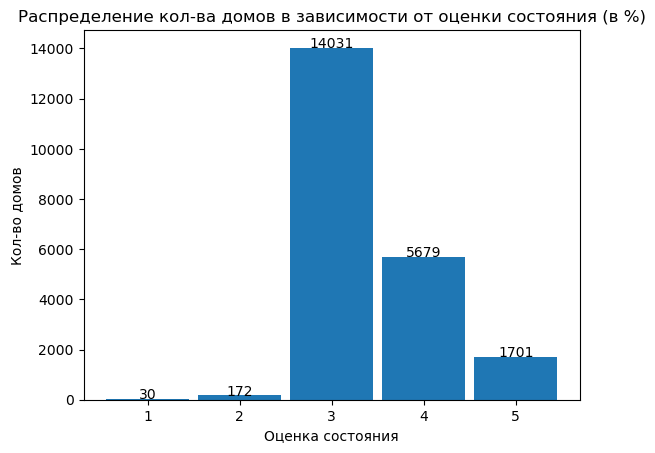

In [35]:
df_c = df.sort_values(by=['condition'])
df_c['condition_1'] = df_c['condition'].apply(lambda x: str(x))
df_c_vc = df_c['condition_1'].value_counts()
df_c_frame = df_c_vc.to_frame(name='values')
df_c_sorted = df_c_frame.sort_index()
plt.hist(df_c['condition_1'], bins = range(df_c['condition_1'].nunique()+1), rwidth=0.9, align = 'left')
plt.title('Распределение кол-ва домов в зависимости от оценки состояния (в %)')
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во домов');
addlabels(df_c_sorted['values']);

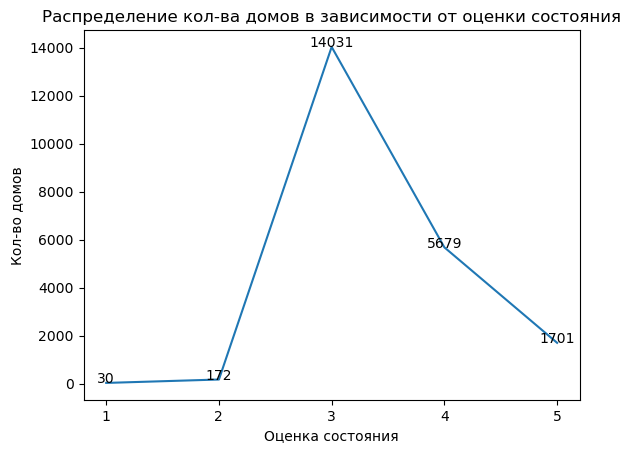

In [34]:
plt.plot(df_c_sorted.index, df_c_sorted.values);
plt.title('Распределение кол-ва домов в зависимости от оценки состояния')
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во домов')
addlabels(df_c_sorted['values']);

### Задача №3
_**Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.**_

In [36]:
df_corr = df.drop(columns=['id', 'date', 'zipcode', 'waterfront_1', 'floors_1'])

In [37]:
df_corr = df.drop(columns=['id', 'date', 'zipcode', 'waterfront_1', 'floors_1'])#удаляем столбцы типа object
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,0.31,0.02,0.59,0.08
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.01,0.13,0.39,0.03
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,0.02,0.22,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.09,0.23,0.14,0.72
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,0.05,0.13,0.28,-0.01
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,-0.01,-0.04,0.09,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.01,-0.08,0.28,0.07
condition,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,-0.01,-0.11,-0.09,-0.00
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,0.11,0.20,0.71,0.12


Для того, что бы оценить, от каких факторов зависит цена, посторим матрицу корреляций и посмотрим на коэффиценты корреляции в столбце 'price' и увидим, что цена наиболее сильно коррелирует со следующими факторами в порядке убывания:
- жилая площадь,
- оценка дома (grade),
- общая площадь,
- кв. метры жилой площади у 15 соседей (sqft_living15),
- количество ванных комнат.

**Обязательно нужно помнить про недостатки коэффициента корееляции:**
- цена недвижимости может зависеть от какого-то фактора нелинейно, расти по экспоненте, изменяться по параболе, по гипрболе
- может быть еще неучтенный фактор (третья величина), влияющая на обе исследуемые величины

<Figure size 800x600 with 0 Axes>

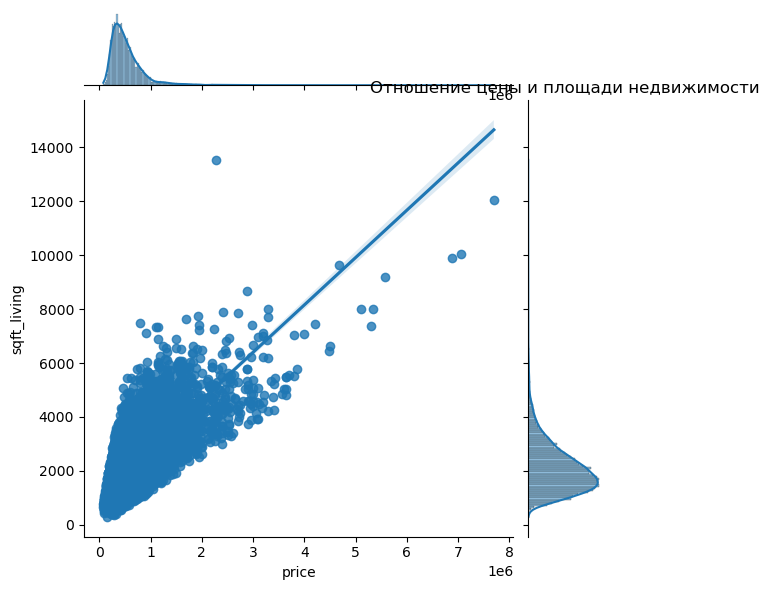

In [44]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Отношение цены и площади недвижимости');

На этом графике видно, что площадь недвижимости влияет на стоимость

<Figure size 800x600 with 0 Axes>

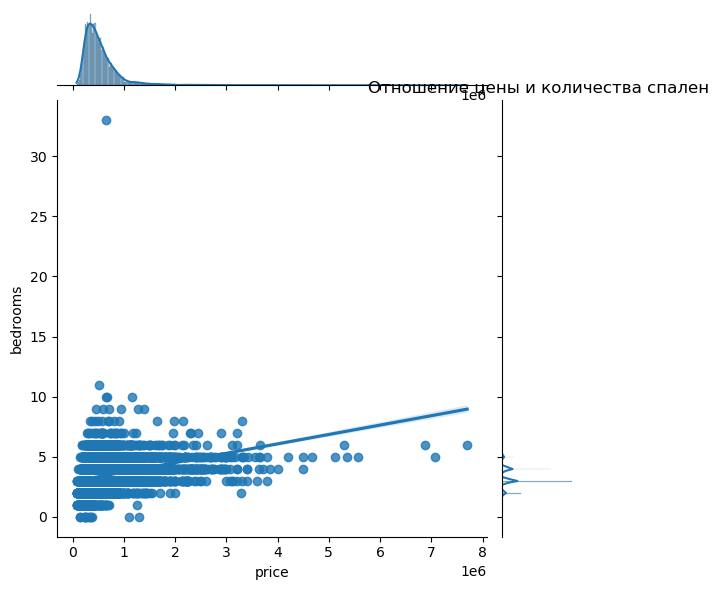

In [48]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')
plt.title('Отношение цены и количества спален');

Из графика видно, что количество спален не сильно влияет на стоимость недвижимости

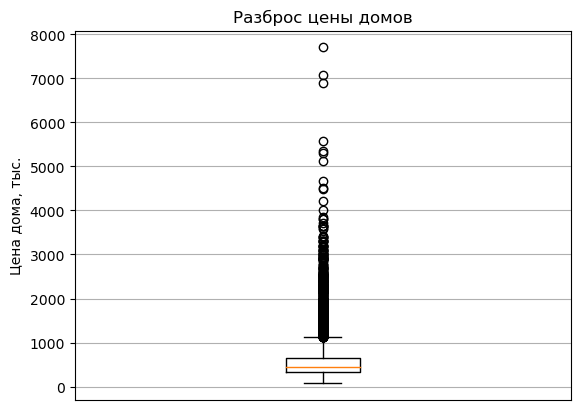

In [45]:
# Для оценки общего разброса цены домов построим "ящик с усами"
df['price_r'] = (df['price']/1000).round(decimals = 2)
plt.boxplot(df['price_r'])
plt.xticks([])
plt.title('Разброс цены домов')
plt.ylabel('Цена дома, тыс.')
plt.grid(True);

График "ящик с усами" показывает нам сильный резброс цены домов. Минимальная цена - 75 тыс. (это мы уже знаем из анализа данных). 50% домов имеют цену в диапазоне от ~ 350 до 700 тыс. Все объекты с ценой более 1 млн с небольшим по графику попадают в аномальные выборосы.

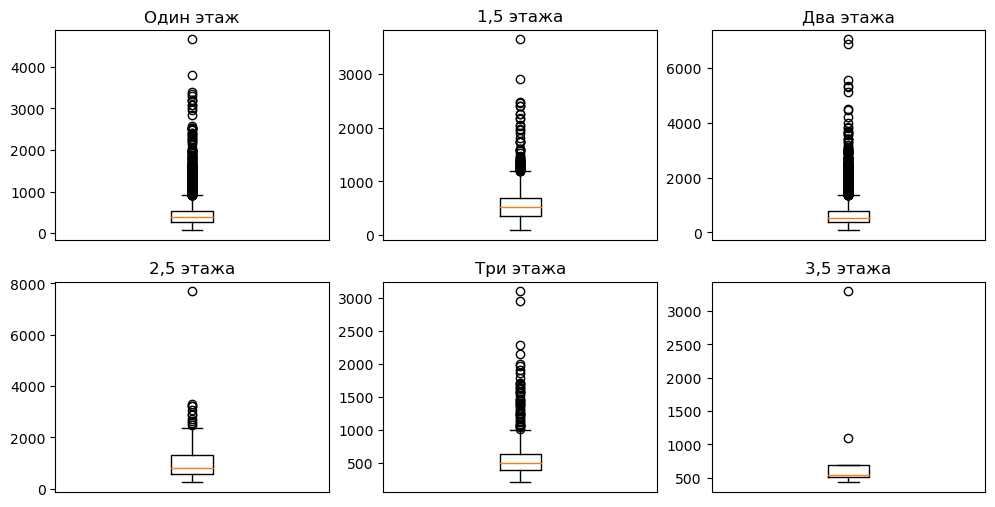

In [46]:
figure, axis = plt.subplots(2, 3, figsize=(12,6))

df_fl_1 = df[df['floors'] == 1]
df_fl_15 = df[df['floors'] == 1.5]
df_fl_2 = df[df['floors'] == 2]
df_fl_25 = df[df['floors'] == 2.5]
df_fl_3 = df[df['floors'] == 3]
df_fl_35 = df[df['floors'] == 3.5]

# Одноэтажные дома
axis[0, 0].boxplot(df_fl_1['price_r'])
axis[0, 0].set_title("Один этаж")
axis[0, 0].xaxis.set_ticks([])

# Полутораэтажные дома
axis[0, 1].boxplot(df_fl_15['price_r'])
axis[0, 1].set_title("1,5 этажа")
axis[0, 1].xaxis.set_ticks([])

# Двухэтажные дома
axis[0, 2].boxplot(df_fl_2['price_r'])
axis[0, 2].set_title("Два этажа")
axis[0, 2].xaxis.set_ticks([])

# 2,5-этажные дома
axis[1, 0].boxplot(df_fl_25['price_r'])
axis[1, 0].set_title("2,5 этажа")
axis[1, 0].xaxis.set_ticks([])
  
# Трехэтажные дома
axis[1, 1].boxplot(df_fl_3['price_r'])
axis[1, 1].set_title("Три этажа")
axis[1, 1].xaxis.set_ticks([])

#3,5-этажные дома
axis[1, 2].boxplot(df_fl_35['price_r'])
axis[1, 2].set_title("3,5 этажа")
axis[1, 2].xaxis.set_ticks([]);

"Ящик с усами" для домов с разной этажностью позволяет оценить разброс цен в разрезе домов с разным количеством этажей. Даже для домов одинаковой этажности мы видим достаточно большой разброс цен и много "аномальных выбросов".